In [1]:
from IPython.core.display import HTML
display(HTML("<style>.container { width:95% !important; }</style>"))   

Author: Andrew Tarzia

Date Created: 12 Jul 2018

License:

# Notebook for getting molecule parameters using RDKIT


In [35]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Descriptors3D import NPR1, NPR2, PMI1, PMI2, PMI3
from rdkit.Chem.Draw.MolDrawing import MolDrawing
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Notes:
# Todo:
- timing

In [36]:
# molecule file dir
molecule_file = '/home/atarzia/psp/molecules/test_molecules.txt'
# output dir
output_dir = '/home/atarzia/psp/molecules/'

In [37]:
def read_mol_txt_file(filename):
    """Function to read molecule SMILES from txt file.
    
    """
    with open(filename, 'r') as f:
        lines = f.readlines()
    molecules = {}
    for line in lines:
        try:
            name, smile = line.rstrip().split(':')
        except ValueError:
            print(line, 'had : in there twice, fix this naming or SMILE')
            print('skipped')
        molecules[name] = smile
    return molecules

In [38]:
def get_inertial_prop(mol, cids):
    """Get inertial 3D descriptors for all conformers in mol.
    
    """
    # ratio 1 is I1/I3
    # ratio 2 is I2/I3
    sml_PMI, mid_PMI, lge_PMI = [], [], []
    ratio_1_, ratio_2_ = [], []
    for cid in cids:
        sml_PMI.append(PMI1(mol, confId=cid))
        mid_PMI.append(PMI2(mol, confId=cid))
        lge_PMI.append(PMI3(mol, confId=cid))
        ratio_1_.append(NPR1(mol, confId=cid))
        ratio_2_.append(NPR2(mol, confId=cid))
    
    return sml_PMI, mid_PMI, lge_PMI, ratio_1_, ratio_2_

In [ ]:
def produce_quick_fig_mol(molecules, filename):
    """Produce a quick/dirty figure showing all the 2D coordinates of molecules in the data set.
    
    """
    mols = [Chem.MolFromSmiles(x) for x in molecules.values()]
    for m in mols: tmp = Chem.Compute2DCoords(m)
    # Draw.MolToFile(mols[0], output_dir+'mol1.png')
    img=Draw.MolsToGridImage(mols,molsPerRow=10,subImgSize=(200,200),legends=[x for x in molecules.keys()])
    img.save(filename)

In [39]:
molecules = read_mol_txt_file(molecule_file)
produce_quick_fig_mol(molecules, output_dir+'test_molecules.pdf')

## Figure of test molecules

## Calculate size and shape

In [184]:
for name, smile in molecules.items():
    print(name,':', 'SMILES:', smile)
    # Read SMILES and add Hs
    mol = Chem.AddHs(Chem.MolFromSmiles(smile))
    # 2D to 3D
    # with multiple conformers
    cids = Chem.EmbedMultipleConfs(mol, 10, Chem.ETKDG())
    print('No. of conformers:', len(cids))
    # quick UFF optimize
    for cid in cids: Chem.UFFOptimizeMolecule(mol, confId=cid)
    # align all conformers
    Chem.AlignMolConformers(mol, atomIds=[0])
    sml_PMI, mid_PMI, lge_PMI, ratio_1_, ratio_2_ = get_inertial_prop(mol, cids)
    

CO2 : SMILES: C(=O)=O
No. of conformers: 10
O2 : SMILES: O=O
No. of conformers: 10
N2 : SMILES: N#N
No. of conformers: 10
H2O : SMILES: O
No. of conformers: 10
methane : SMILES: C
No. of conformers: 10
ethene : SMILES: C=C
No. of conformers: 10
ethane : SMILES: CC
No. of conformers: 10
ethanol : SMILES: CCO
No. of conformers: 10
propene : SMILES: CC=C
No. of conformers: 10
n-propane : SMILES: CCC
No. of conformers: 10
1-butene : SMILES: CCC=C
No. of conformers: 10
n-butane : SMILES: CCCC
No. of conformers: 10
i-butene : SMILES: CC(=C)C
No. of conformers: 10
i-butane : SMILES: CC(C)C
No. of conformers: 10
1-butanol : SMILES: CCCCO
No. of conformers: 10
2,2-dimethylbutane : SMILES: CCC(C)(C)C
No. of conformers: 10
2,3-dimethylbutane : SMILES: CC(C)C(C)C
No. of conformers: 10
3-methylpentane : SMILES: CCC(C)CC
No. of conformers: 10
2-methylpentane : SMILES: CCCC(C)C
No. of conformers: 10
2,2-dimethylpentane : SMILES: CCCC(C)(C)C
No. of conformers: 10
n-hexane : SMILES: CCCCCC
No. of confo

In [147]:
sml_PMI[0], mid_PMI[0], lge_PMI[0], ratio_1_[0], ratio_2_[0]

(89.86068305210318,
 197.20504812583727,
 287.06573117763475,
 0.31303173208263535,
 0.6869682679184296)

In [149]:
print(Chem.MolToMolBlock(mol))


     RDKit          3D

 13 13  0  0  0  0  0  0  0  0999 V2000
    2.5121    0.0620   -0.1449 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1211    0.0569   -0.0717 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4256   -1.1192    0.2466 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9714   -1.1101    0.3167 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6770    0.0718    0.0696 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9860    1.2454   -0.2478 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4111    1.2382   -0.3184 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0543   -0.7764    0.0282 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9654   -2.0377    0.4390 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5067   -2.0181    0.5623 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7579    0.0782    0.1240 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5324    2.1599   -0.4390 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.9419    2.1491   -0.5645 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0

## plot all pIs in output CSV
### colour by modification


In [7]:
pi_data = pd.read_csv(param_dict['out_CSV_pi'], index_col=False)

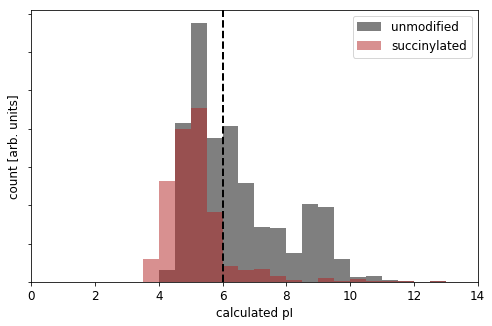

In [8]:
plt.rcParams['font.size'] = 12

fig, ax = plt.subplots(figsize=(8, 5))
# unmodifed
mod_dict = modifications['0']
data = pi_data[pi_data['modification'] == 0]
n, bins, patches = ax.hist(data['pi'], facecolor=mod_dict['colour'], alpha = 0.5, 
                           bins=np.arange(0, 14 + 0.2, 0.5),
                           label = mod_dict['name'])

# modification 1 - succinylation
mod_dict = modifications['1']
data = pi_data[pi_data['modification'] == 1]
n, bins, patches = ax.hist(data['pi'], facecolor=mod_dict['colour'], alpha = 0.5, 
                           bins=np.arange(0, 14 + 0.2, 0.5),
                           label = mod_dict['name'])

ax.set_xlabel('calculated pI')
ax.set_ylabel('count [arb. units]')
ax.set_yticklabels([])

#plot cut-off
ax.axvline(x=param_dict['cutoff_pi'], c='k', lw='2', linestyle='--')

ax.set_xlim(0, 14)
ax.legend()


fig.savefig('pI_histogram.pdf', dpi=720, bbox_inches='tight')